## Importing Basic Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as xp
import plotly.graph_objects as go

import sklearn
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
import xgboost as xgb
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading The Files or Importing Data from different Files.ie train,test,oil,holidays etc.

In [4]:
#1
train = pd.read_csv('train.csv')

In [5]:
#2
test = pd.read_csv('test.csv')   

In [6]:
#3
store = pd.read_csv('stores.csv') #

In [7]:
#4
oil = pd.read_csv('oil.csv')  #

In [8]:
#5
holidays = pd.read_csv('holidays_events.csv')  #

# Problem Statement
Forecast daily sales for each product family at each store for the next 15 days after the last transactions.

# Data Processing and Feature Engineering

### Information about data

#### 1 Train data

In [13]:
train.sample(5)

id        date  store_nbr                   family    sales  \
1790354  1790354  2015-10-04         43             BREAD/BAKERY  332.000   
2975463  2975463  2017-08-01         45                HOME CARE  816.000   
2038866  2038866  2016-02-22         16  PLAYERS AND ELECTRONICS    5.000   
2064654  2064654  2016-03-07          4                     DELI  177.476   
2209123  2209123  2016-05-27         43                    BOOKS    0.000   

         onpromotion  
1790354           36  
2975463            9  
2038866            0  
2064654            0  
2209123            0

In [14]:
# Number of rows and columns in data set.
train.shape

(3000888, 6)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [16]:
# Summary statistics
train.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

In [17]:
# There is no missing value found in train data set.
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [18]:
# Date casting
train['date'] = train['date'].astype('datetime64[ns]')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


#### 2 Store data

In [21]:
store.sample(5)

store_nbr       city       state type  cluster
35         36   Libertad      Guayas    E       10
26         27      Daule      Guayas    D        1
9          10      Quito   Pichincha    C       15
49         50     Ambato  Tungurahua    A       14
12         13  Latacunga    Cotopaxi    C       15

In [22]:
# Number of rows and columns in data set.
store.shape

(54, 5)

In [23]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
# Summary statistics
store.describe()

store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000

In [25]:
# There is no missing value found in store data set.
store.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#### 3 Oil data

In [27]:
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [28]:
oil.shape

(1218, 2)

In [29]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [30]:
oil.describe()

dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000

In [31]:
# There is misssing values present in 'dcoilwtico' column.
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [32]:
# date time conversion
oil['date'] = oil['date'].astype('datetime64[ns]')

In [33]:
# Treating the missing values with interpolation and median.
oil['dcoilwtico'].median()

53.19

In [34]:
oil = oil.interpolate()

In [35]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(oil['dcoilwtico'].median())

In [36]:
# Missing values are treated and type casting done on data col.
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [37]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


#### 4 Holidays data

In [39]:
holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [40]:
holidays.shape

(350, 6)

In [41]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [42]:
holidays.describe()

date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338

In [43]:
holidays['date'] = holidays['date'].astype('datetime64[ns]')

In [44]:
# There is no missing values present in the data set.
holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [45]:
#### 5 Test data

In [46]:
test.head(1)

id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0

In [47]:
 test['date'] = pd.to_datetime( test['date'] )

#### Merging the data set store,oil,holidays in to train data set.

In [49]:
t_s = train.merge(store)

In [50]:
t_s.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  
0    D       13  
1    D       13  
2    D       13  
3    D       13  
4    D       13

In [51]:
data_frames = [t_s,oil,holidays]

In [52]:
o_h = pd.merge(oil,holidays,on='date')

###  Creating the final data frame.

In [54]:
# Creating the final data frame.
df = pd.merge(t_s,o_h,on='date')

In [55]:
df.head()

id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type_x  cluster  dcoilwtico   type_y    locale locale_name  \
0      D       13       53.18  Holiday  National     Ecuador   
1      D       13       53.18  Holiday  National     Ecuador   
2      D       13       53.18  Holiday  National     Ecuador   
3      D       13       53.18  Holiday  National     Ecuador   
4      D       13       53.18  Holiday  National     Ecuador   

          description  transferred  
0  Primer dia del ano        False  
1  Primer dia del ano        False  
2  Primer dia del ano        False  
3  Primer dia del ano        False  
4  Primer dia del ano        False

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352836 entries, 0 to 352835
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           352836 non-null  int64         
 1   date         352836 non-null  datetime64[ns]
 2   store_nbr    352836 non-null  int64         
 3   family       352836 non-null  object        
 4   sales        352836 non-null  float64       
 5   onpromotion  352836 non-null  int64         
 6   city         352836 non-null  object        
 7   state        352836 non-null  object        
 8   type_x       352836 non-null  object        
 9   cluster      352836 non-null  int64         
 10  dcoilwtico   352836 non-null  float64       
 11  type_y       352836 non-null  object        
 12  locale       352836 non-null  object        
 13  locale_name  352836 non-null  object        
 14  description  352836 non-null  object        
 15  transferred  352836 non-null  bool

In [57]:
# Summary statistics
df.describe()

id                           date      store_nbr  \
count  3.528360e+05                         352836  352836.000000   
mean   1.628316e+06  2015-07-05 05:49:05.454545664      27.500000   
min    0.000000e+00            2013-01-01 00:00:00       1.000000   
25%    9.751990e+05            2014-07-03 00:00:00      14.000000   
50%    1.687554e+06            2015-08-07 12:00:00      27.500000   
75%    2.183840e+06            2016-05-13 00:00:00      41.000000   
max    3.000887e+06            2017-08-15 00:00:00      54.000000   
std    7.954575e+05                            NaN      15.585806   

               sales    onpromotion        cluster     dcoilwtico  
count  352836.000000  352836.000000  352836.000000  352836.000000  
mean      370.968396       3.402351       8.481481      64.820699  
min         0.000000       0.000000       1.000000      27.960000  
25%         0.000000       0.000000       4.000000      45.130000  
50%        12.000000       0.000000       8.500000      52.812500  
75%       202.000000       0.000000      13.000000      95.250000  
max    124717.000000     716.000000      17.000000     107.950000  
std      1196.785036      14.857531       4.649741      25.168111

In [58]:
# Number of rows and columns in final data set.
df.shape

(352836, 16)

In [59]:
# There is no missing value found in train data set.
df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
type_y         0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

## Feature Engineering 

In [61]:
#### (Time-based Features)

In [62]:
# Extract day, week, month, year, and day of the week

In [63]:
season = df.copy()

In [64]:
season['day'] = season['date'].dt.day
season['month'] =  season['date'].dt.month
season['year'] =  season['date'].dt.year
season['week'] =  season['date'].dt.isocalendar().week
season['day of the week'] = season['date'].dt.day_name()
season['month_name'] =  season['date'].dt.month_name()

### Exploratory Data Analysis (EDA)

### Identify Seasonal Trends for Oil Price and Sales Only for Grocery I Family

### Year Wise 

In [68]:
season1 = season.loc[season['family'] == 'GROCERY I']

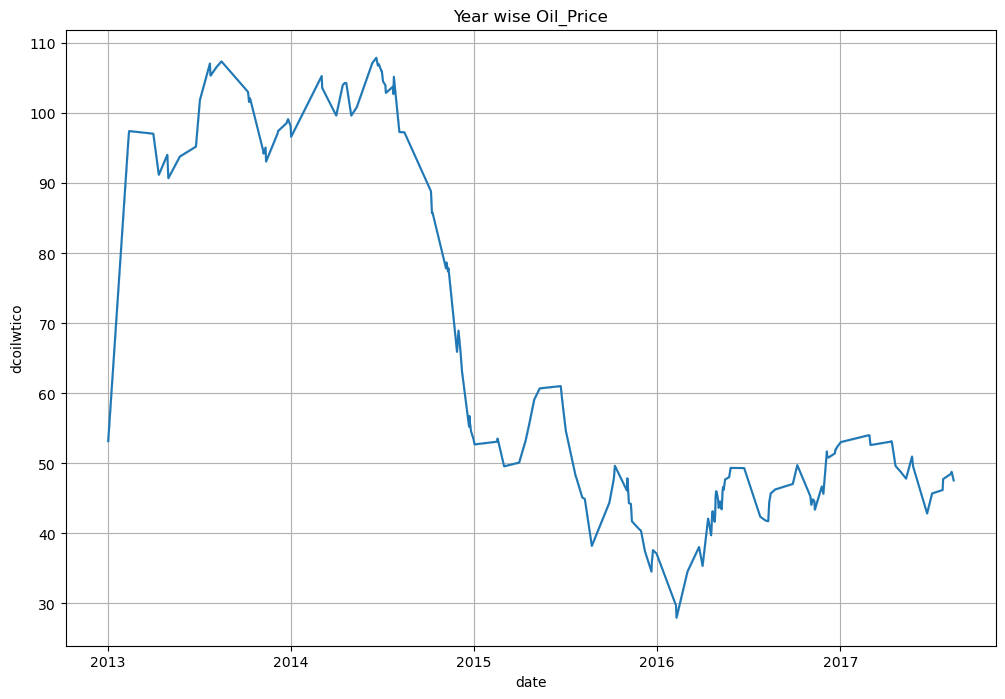

In [69]:
plt.figure(figsize=[12,8])
ax = sns.lineplot(season1,x='date',y='dcoilwtico')
plt.grid()
plt.title('Year wise Oil_Price')
plt.show()

### Conclusion
- From above figure Shows that oil price trend is decresing.

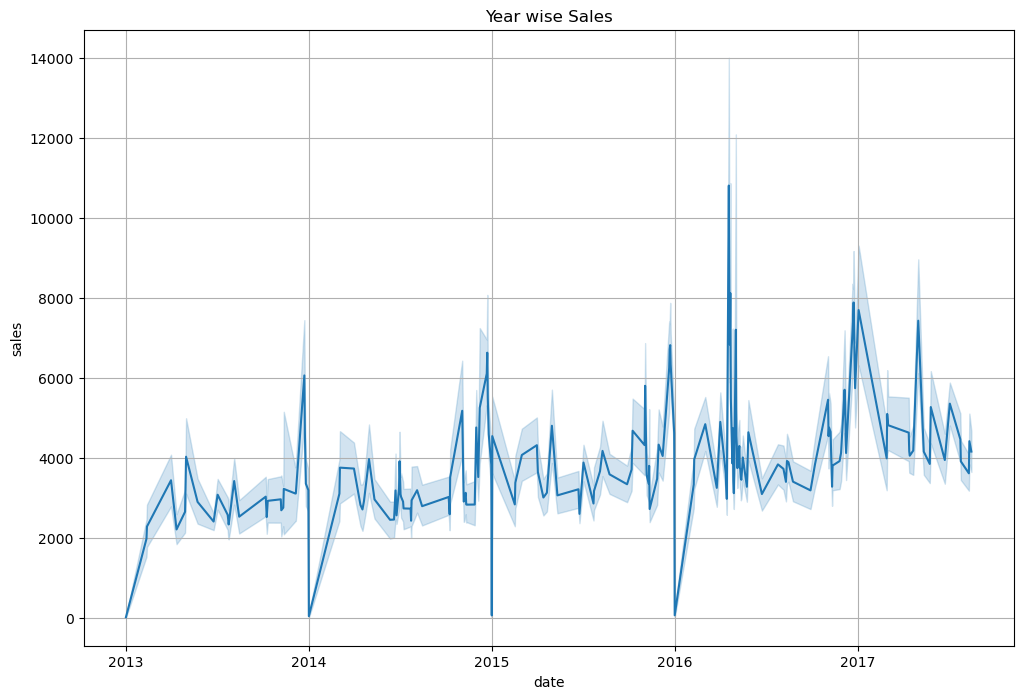

In [71]:
plt.figure(figsize=[12,8])
ax = sns.lineplot(season1,x='date',y='sales')
plt.grid()
plt.title('Year wise Sales')
plt.show()

### Conclusion
- From above figure Shows that sales trend is increasing.

## Month Wise

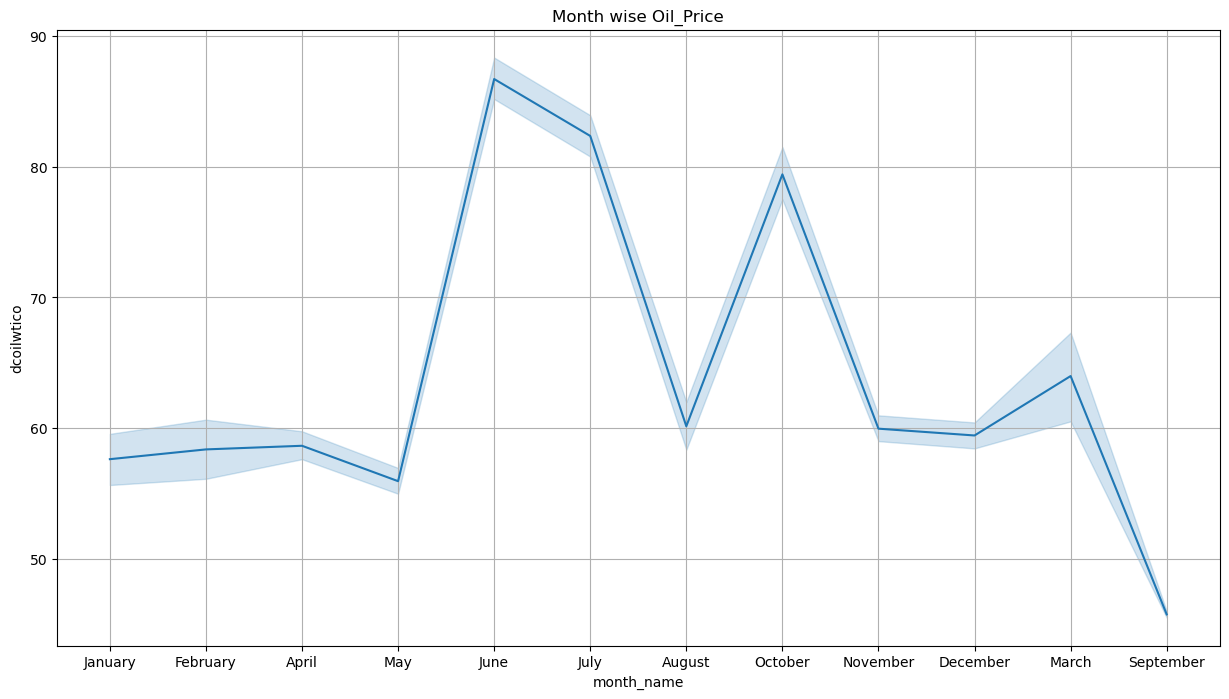

In [74]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(season1,x='month_name',y='dcoilwtico')
plt.grid()
plt.title('Month wise Oil_Price')
plt.show()

### Conclusion
- From above figure Shows that month wise oil price is high on june  and  low on september.

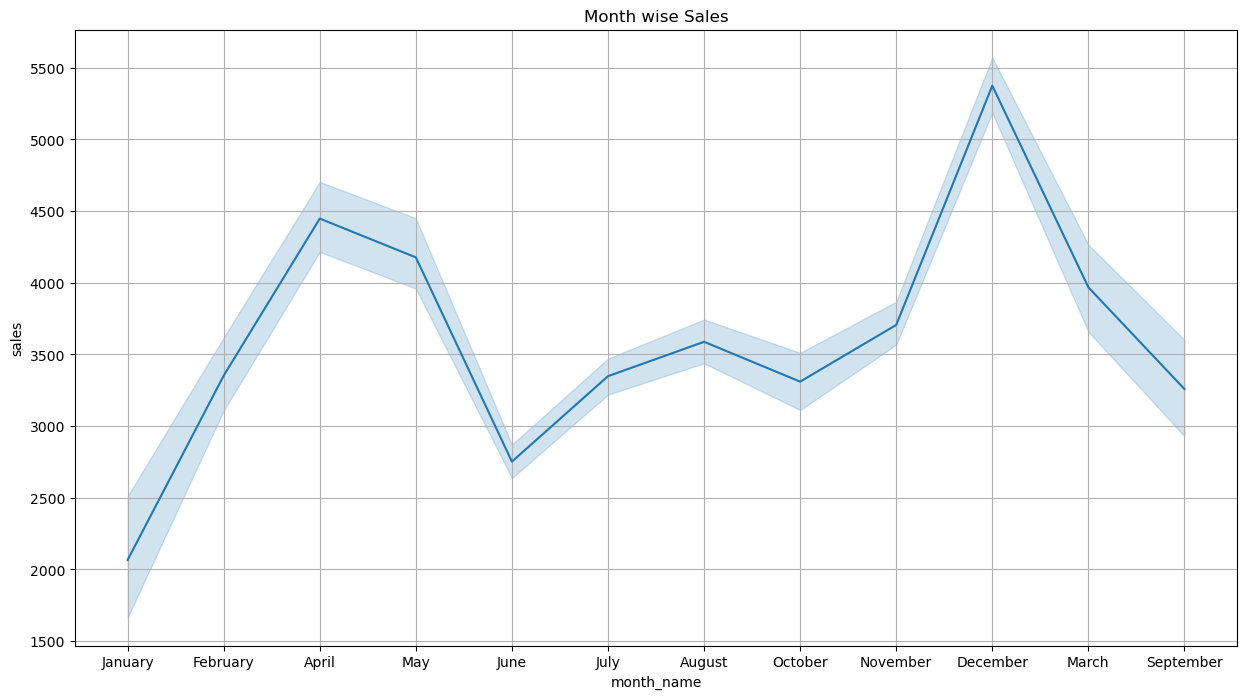

In [76]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(season1,x='month_name',y='sales')
plt.grid()
plt.title('Month wise Sales')
plt.show()

### Conclusion
- From above figure Shows that month wise sales is high on december  and  low on january.

## Day Wise

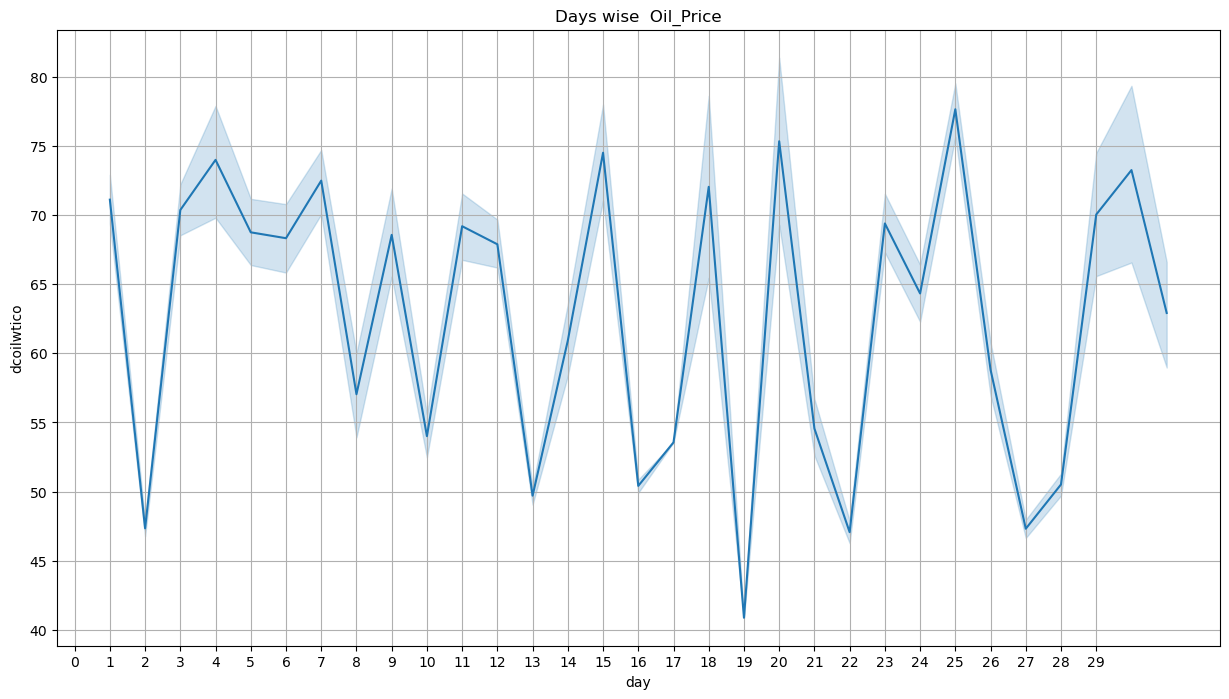

In [79]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(season1,x='day',y='dcoilwtico',)
plt.grid()
plt.xticks(np.arange(0, 30, step=1))
plt.title('Days wise  Oil_Price')
plt.show()

### Conclusion
- From above figure Shows that day wise oil price is high on 25th day and  low on 19th day.

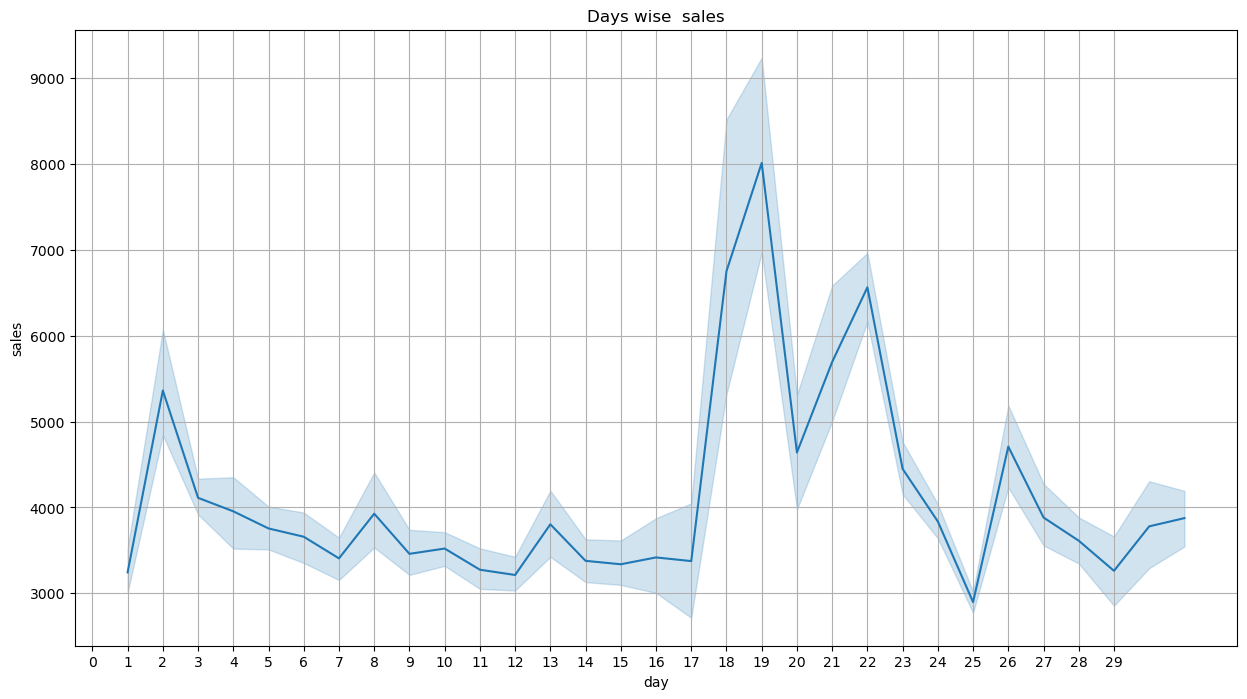

In [81]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(season1,x='day',y='sales',)
plt.grid()
plt.xticks(np.arange(0, 30, step=1))
plt.title('Days wise  sales')
plt.show()

### Conclusion
- From above figure Shows that day wise sales is high on 19th day and  low on 25th day.

In [83]:
# Define the order of days
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'DayOfWeek' to categorical type with specified order
season['day of the week'] = pd.Categorical(season['day of the week'], categories=days_order, ordered=True)

# Sort the DataFrame by 'DayOfWeek'
df_sorted = season1.sort_values(by='day of the week')

## Day of Week Wise

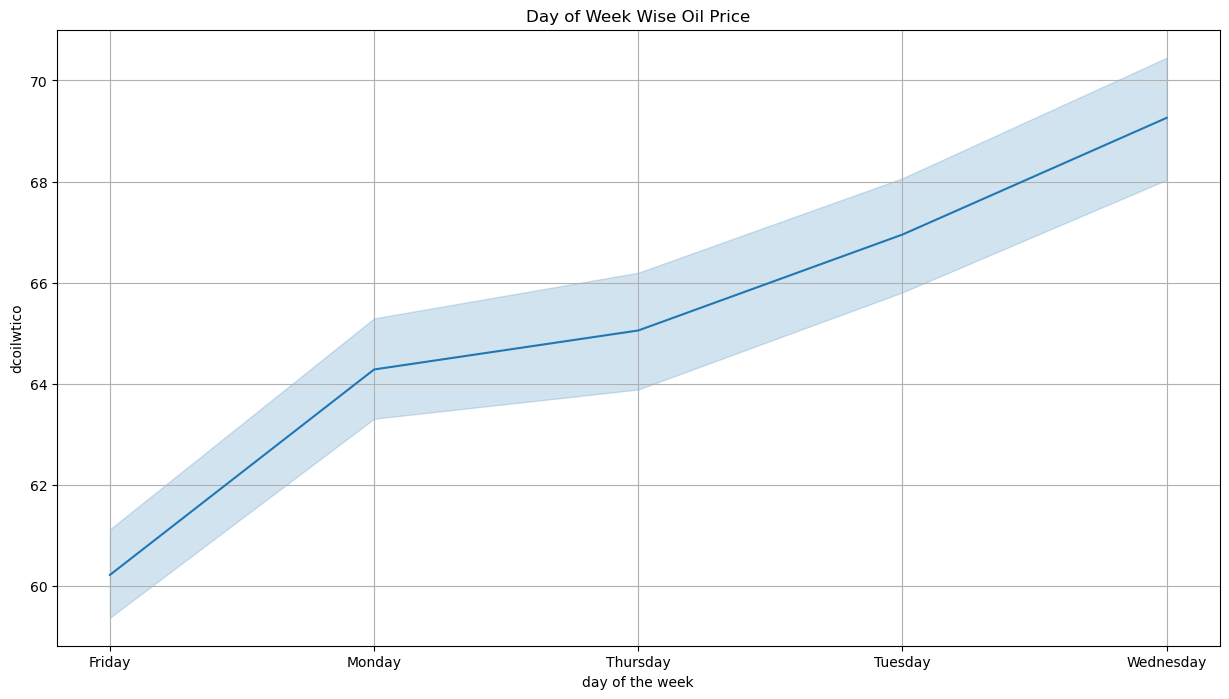

In [85]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(df_sorted,x='day of the week',y='dcoilwtico',)
plt.grid()
plt.title('Day of Week Wise Oil Price')
plt.show()

### Conclusion
- From above figure Shows that oil price of day of week is on wednesday is highest sales and friday is very low.

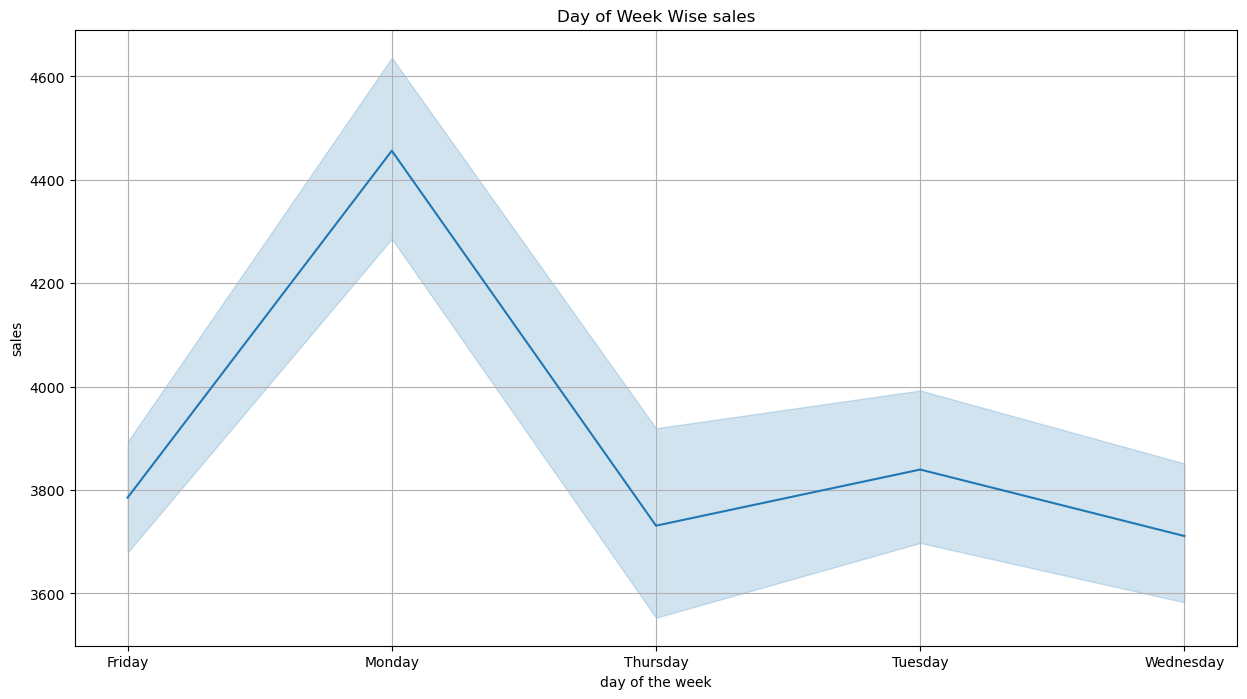

In [87]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(df_sorted,x='day of the week',y='sales',)
plt.grid()
plt.title('Day of Week Wise sales')
plt.show()

### Conclusion
- From above figure Shows that sales of day of week is on monday is highest sales and wednesday is very low.

### Store-Specific Aggregations

In [90]:
# Compute average sales per store type

In [91]:
season.groupby('type_x')['sales'].mean()

type_x
A    721.467255
B    344.065751
C    202.811595
D    366.561945
E    286.568284
Name: sales, dtype: float64

In [92]:
season1.groupby('type_x')['sales'].mean().plot(kind='bar');

### Conclusion
- From above figure shows that Type 'A' Shows highest sales .

In [94]:
# Identify top-selling product families per cluster.

In [95]:
grouped_sales = season.groupby(['cluster','family'])['sales'].sum().reset_index()
grouped_sales.head()

cluster      family      sales
0        1  AUTOMOTIVE     2040.0
1        1   BABY CARE       24.0
2        1      BEAUTY     2324.0
3        1   BEVERAGES  1514209.0
4        1       BOOKS       55.0

In [96]:
# Sort the grouped data by cluster and sales in descending order
sorted_sales = grouped_sales.sort_values(by=['cluster', 'sales'], ascending=[True, False])

In [97]:
# Identify the top-selling product family per cluster
top_selling_per_cluster = sorted_sales.groupby('cluster').head(1)
top_selling_per_cluster

cluster     family        sales
12         1  GROCERY I  1821012.000
45         2  GROCERY I  1018617.174
78         3  GROCERY I  3460505.105
111        4  GROCERY I  1916349.063
144        5  GROCERY I  1947176.825
177        6  GROCERY I  5408824.957
210        7  GROCERY I   776196.908
243        8  GROCERY I  3240780.702
276        9  GROCERY I  1064835.922
309       10  GROCERY I  3697824.893
342       11  GROCERY I  3539562.958
375       12  GROCERY I   778405.850
408       13  GROCERY I  2854305.238
441       14  GROCERY I  6262957.532
474       15  GROCERY I  2702776.273
507       16  GROCERY I   500155.136
540       17  GROCERY I   986666.000

### Conclusion
- From above table indicated that GROCERY I Shows highest sales with different clusters.

### Rolling Statistics

In [100]:
# Compute moving averages and rolling standard deviations for past sales, Include lagged features (e.g., sales from the previous week, previous month).

In [101]:
season['sales'].rolling(window=30).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
352831    531.617500
352832    535.991600
352833    616.149233
352834    620.182567
352835    620.382567
Name: sales, Length: 352836, dtype: float64

In [102]:
season['sales'].rolling(window=30).std()

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
352831    1341.491468
352832    1339.990079
352833    1379.103980
352834    1377.415755
352835    1377.324535
Name: sales, Length: 352836, dtype: float64

In [103]:
# To check is there any correlations between sales vs oil price.
season1[['dcoilwtico','sales']].corr()

dcoilwtico     sales
dcoilwtico    1.000000 -0.190665
sales        -0.190665  1.000000

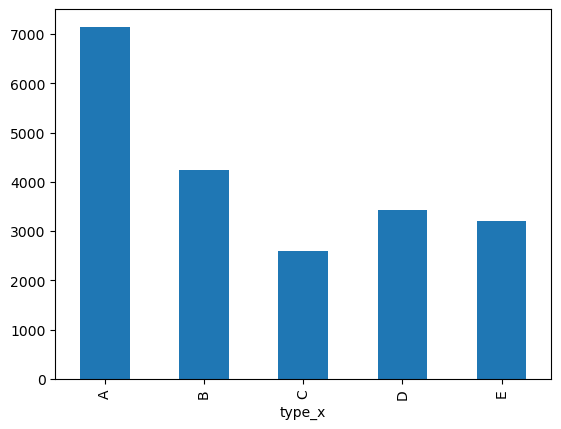

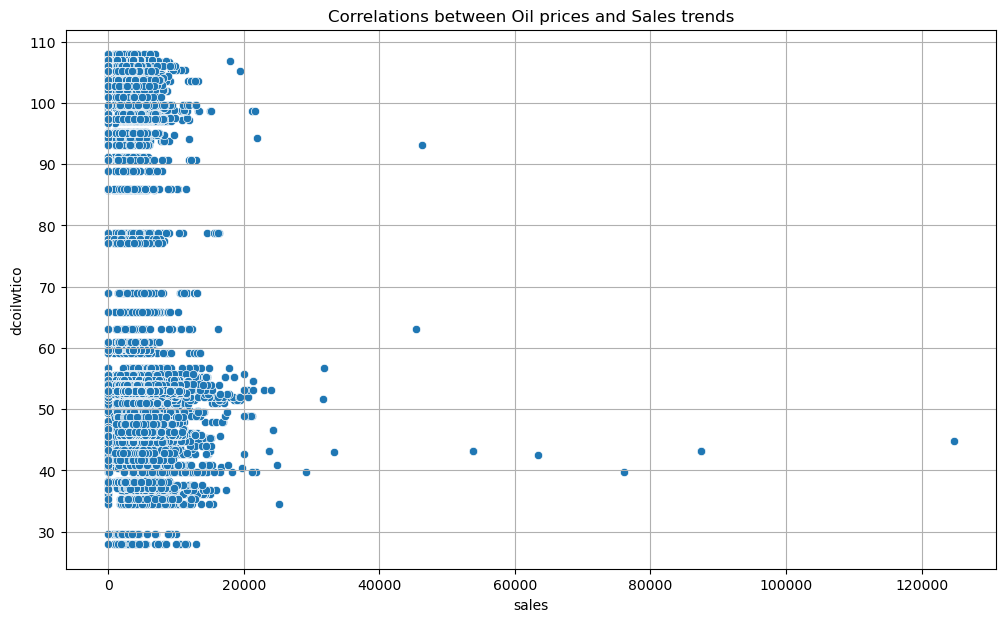

In [104]:
plt.figure(figsize=[12,7])
plt.title('Correlations between Oil prices and Sales trends')
sns.scatterplot(season1,y='dcoilwtico',x='sales')
plt.grid('on')
plt.show()

### Conclusion
- From above corelation diagram oilprice vs sales there is very negative corelation present.

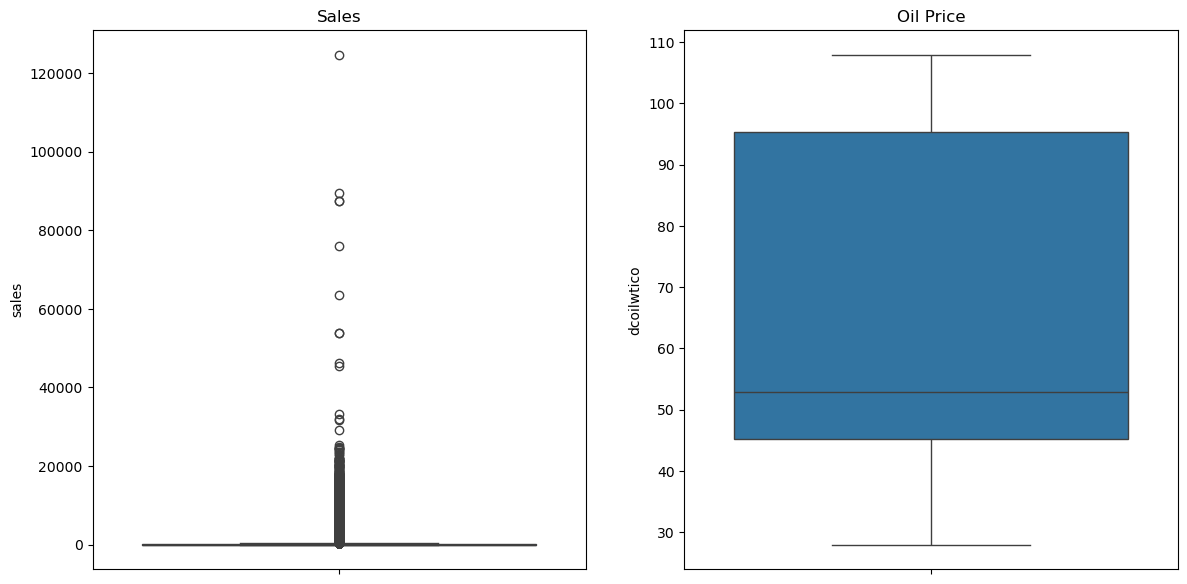

In [106]:
# to check is there any outlier in the data
fig,ax = plt.subplots(1,2,figsize=[14,7])
sns.boxplot(season,y='sales',ax=ax[0])
sns.boxplot(season,y='dcoilwtico',ax=ax[1])
ax[0].set_title('Sales')
ax[1].set_title('Oil Price')
plt.show()

### Conclusion
- From above figure sales has lot of outliers present in the data.

In [108]:
holidays['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [109]:
# Number of holidays
holidays.loc[holidays['type']=='Holiday', 'date']

0     2012-03-02
1     2012-04-01
2     2012-04-12
3     2012-04-14
4     2012-04-21
         ...    
338   2017-11-12
340   2017-12-06
341   2017-12-08
344   2017-12-22
348   2017-12-25
Name: date, Length: 221, dtype: datetime64[ns]

In [110]:
sales_seasons = season.groupby(['date','type_y'])['sales'].sum().reset_index()

In [111]:
holiday_sales = sales_seasons.query('type_y == "Holiday" ')
holiday_sales

date   type_y         sales
0   2013-01-01  Holiday  2.511619e+03
1   2013-02-11  Holiday  2.786276e+05
2   2013-02-12  Holiday  3.088008e+05
3   2013-04-01  Holiday  4.288164e+05
4   2013-04-12  Holiday  3.143950e+05
..         ...      ...           ...
178 2017-05-24  Holiday  7.463036e+05
180 2017-06-23  Holiday  7.610497e+05
181 2017-07-03  Holiday  1.850287e+06
184 2017-08-10  Holiday  6.513869e+05
186 2017-08-15  Holiday  7.626619e+05

[116 rows x 3 columns]

In [112]:
total_sales = season1.groupby('date')['sales'].sum().reset_index()

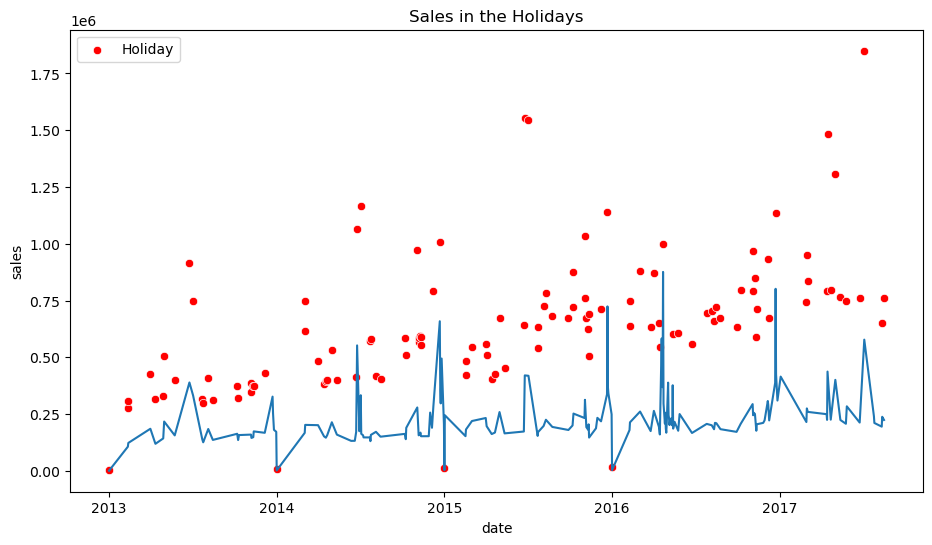

In [113]:
plt.figure(figsize=[11,6])
sns.lineplot(x='date', y='sales', data=total_sales)
sns.scatterplot(data = holiday_sales ,x='date',y='sales', color='red', label='Holiday')
plt.legend()
plt.title('Sales in the Holidays')
plt.show()

In [114]:
# Create a figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=total_sales['date'], y=total_sales['sales'], mode='lines'))

# Add a scatter trace
fig.add_trace(go.Scatter(x=holiday_sales['date'], y=holiday_sales['sales'], mode='markers', name='Holiday'))

# Customize the plot
fig.update_layout(title='Analyze sales before and after holidays',
                  xaxis_title='Dates',
                  yaxis_title='Sales')

### Conclusion
.# In Holidays most of holidays sales is very high compare to noramal days sales,
.# In some cases like jan-2013,jan-2014,jan-2014,jan-2015 jan-2016,jan-2017 sales very low in holidays compared to normal days.

In [116]:
# To check the given data is time series or not.
import statsmodels.api as sm
print(sm.stats.durbin_watson(season1['sales']))
print(sm.stats.durbin_watson(season1['dcoilwtico']))

0.470693447016957
6.710417265002322e-05


In [117]:
if sm.stats.durbin_watson(season1['sales']) == 2:
    print('This is not time series data')
else:
     print('This is time series data')
    

This is time series data


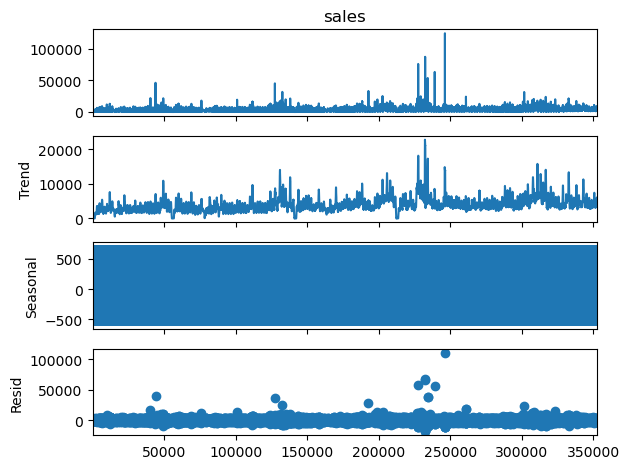

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose =  seasonal_decompose(season1['sales'],period=12)
decompose.plot()
plt.show()

In [119]:
# To check given data is stationary or not if not make data into stationary. 
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(season1['sales'])

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret results
if result[1] < 0.05:
    print("Reject the null hypothesis. The series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The series is likely non-stationary.")

ADF Statistic: -10.625655
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject the null hypothesis. The series is likely stationary.


In [120]:
season1.head()

id       date  store_nbr     family  sales  onpromotion       city  \
12    12 2013-01-01          1  GROCERY I    0.0            0      Quito   
45    45 2013-01-01         10  GROCERY I    0.0            0      Quito   
78    78 2013-01-01         11  GROCERY I    0.0            0    Cayambe   
111  111 2013-01-01         12  GROCERY I    0.0            0  Latacunga   
144  144 2013-01-01         13  GROCERY I    0.0            0  Latacunga   

         state type_x  cluster  dcoilwtico   type_y    locale locale_name  \
12   Pichincha      D       13       53.18  Holiday  National     Ecuador   
45   Pichincha      C       15       53.18  Holiday  National     Ecuador   
78   Pichincha      B        6       53.18  Holiday  National     Ecuador   
111   Cotopaxi      C       15       53.18  Holiday  National     Ecuador   
144   Cotopaxi      C       15       53.18  Holiday  National     Ecuador   

            description  transferred  day  month  year  week day of the week  \
12   Primer dia del ano        False    1      1  2013     1         Tuesday   
45   Primer dia del ano        False    1      1  2013     1         Tuesday   
78   Primer dia del ano        False    1      1  2013     1         Tuesday   
111  Primer dia del ano        False    1      1  2013     1         Tuesday   
144  Primer dia del ano        False    1      1  2013     1         Tuesday   

    month_name  
12     January  
45     January  
78     January  
111    January  
144    January

In [121]:
train_df = season1[['date','store_nbr', 'family', 'sales', 'onpromotion','day', 'month', 'year']]
train_df.set_index('date',inplace = True)

In [122]:
# test['year'] = test['date'].dt.year
# test['month'] = test['date'].dt.month
# test['day'] = test['date'].dt.day

In [123]:
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [124]:
f_test_val = test[['store_nbr','family','onpromotion']]
f_test_val = test.loc[test['family'] == 'GROCERY I']
f_test_val.shape

(864, 5)

# Model Building

In [126]:
# spliting the data into train and test
f_train = train_df.loc[train_df.index.year < 2017]
f_test = train_df.loc[train_df.index.year >= 2017] # seven month data for testing

In [127]:
f_train_x = f_train[['onpromotion','day','month','year']]
f_train_y = f_train[['sales']]

In [128]:
f_test_x = f_test[['onpromotion','day','month','year']]
f_test_y = f_test[['sales']]

In [129]:
# Create pipeline
pipe = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor())
])

In [130]:
pipe.fit(f_train_x,f_train_y)

Pipeline(steps=[('classifier', RandomForestRegressor())])

In [131]:
forecast_randomforest = pipe.predict(f_test_x)

In [132]:
rmse_rf = np.sqrt(mean_squared_error(f_test_y,forecast_randomforest))

In [133]:
r2_score_rf = r2_score(f_test_y,forecast_randomforest)

In [134]:
mean_absolute_percentage_error_rf = mean_absolute_percentage_error(f_test_y,forecast_randomforest)

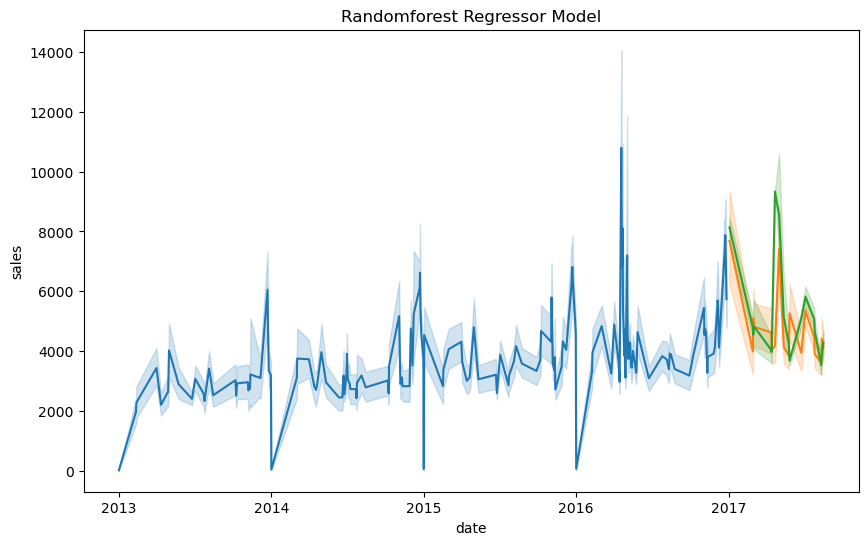

In [135]:
plt.figure(figsize=[10,6])
sns.lineplot(f_train_y,x=f_train_y.index,y=f_train_y.sales)
sns.lineplot(f_test_y,x=f_test_y.index,y=f_test_y.sales)
sns.lineplot(f_test_x,x=f_test_x.index,y=forecast_randomforest)
plt.title('Randomforest Regressor Model')
plt.show()

### Note
- Here above diagram blue line indicates train data set , orange color indicates test data set and green line indicates forecasted values.

In [137]:
pipe1 = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('classifier', XGBRegressor())
])

In [138]:
pipe1.fit(f_train_x,f_train_y)

Pipeline(steps=[('classifier',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [139]:
forecast_xgbr = pipe.predict(f_test_x)

In [140]:
rmse_xgb = np.sqrt(mean_squared_error(f_test_y,forecast_xgbr))

In [141]:
r2_score_xgb = r2_score(f_test_y,forecast_xgbr)

In [142]:
mean_absolute_percentage_error_xgb = mean_absolute_percentage_error(f_test_y,forecast_xgbr)

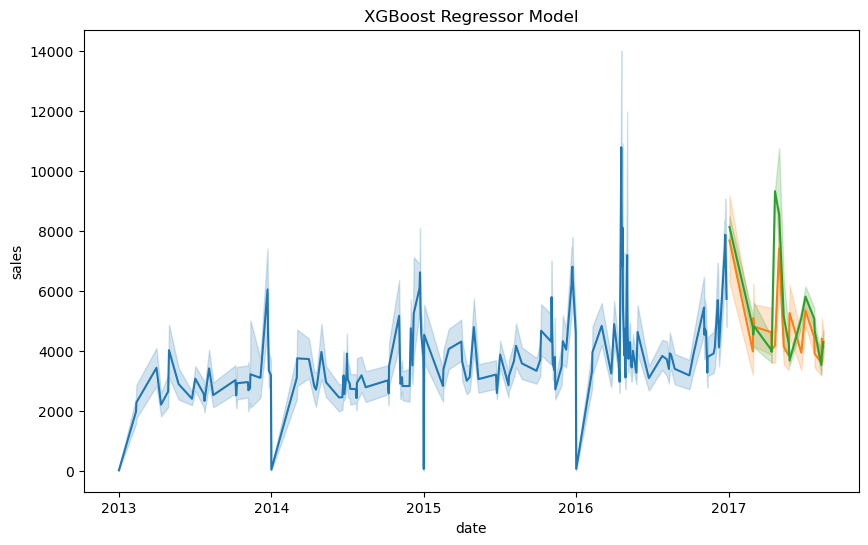

In [143]:
plt.figure(figsize=[10,6])
sns.lineplot(f_train_y,x=f_train_y.index,y=f_train_y.sales)
sns.lineplot(f_test_y,x=f_test_y.index,y=f_test_y.sales)
sns.lineplot(f_test_x,x=f_test_x.index,y=forecast_xgbr)
plt.title('XGBoost Regressor Model')
plt.show()

In [144]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # trend (pdq)

model_pdq = [(x[0], x[1],x[2], 5) for x in list(itertools.product(p, d, q))] # seasonality (PDQ)
print("Example of parameter combinations for Model.....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[1], model_pdq[0]))
print('Model : {}{}'.format(pdq[0], model_pdq[1]))
print('Model : {}{}'.format(pdq[2], model_pdq[1]))

Example of parameter combinations for Model.....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 0, 5)
Model : (0, 0, 0)(0, 0, 1, 5)
Model : (0, 0, 2)(0, 0, 1, 5)


In [145]:
# creating an empty DataFrame with column names
dfobj = pd.DataFrame(columns=['Param', 'seasonal','AIC'])
dfobj

Empty DataFrame
Columns: [Param, seasonal, AIC]
Index: []

In [146]:
import pandas as pd
import statsmodels.api as sm
import itertools

# Define parameters
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q))  # trend (pdq)
model_pdq = [(x[0], x[1],x[2], 5) for x in list(itertools.product(p, d, q))]


# Create an empty DataFrame to store results
dfobj = pd.DataFrame(columns=['Param', "seasonal", 'AIC'])

# Loop through parameters
for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(f_train_y['sales'], order=param, seasonal_order=param_seasonal,
                                         enforce_stationarity=False, enforce_invertibility=False)
        results_SARIMA = model.fit()
        
        # Create a new DataFrame with the results
        new_row = pd.DataFrame({'Param': [param], "seasonal": [param_seasonal], 'AIC': [results_SARIMA.aic]})
        
        # Concatenate the new row to dfobj
        dfobj = pd.concat([dfobj, new_row], ignore_index=True)
        
        # print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))


C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date inde

In [147]:
dfobj.sort_values(by='AIC').head(3)

Param      seasonal            AIC
77  (2, 0, 2)  (1, 0, 2, 5)  181005.493376
74  (2, 0, 2)  (0, 0, 2, 5)  181006.482531
79  (2, 0, 2)  (2, 0, 1, 5)  181020.012129

In [148]:
f_test['onpromotion'] = f_test['onpromotion'].astype('int')

In [149]:
# (2, 0, 2)	(1, 0, 2, 5)	181005.493376
model = sm.tsa.statespace.SARIMAX(f_train_y['sales'], order=(2,0,2), seasonal_order=(1,0,2,5),
                                         enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
print(results.summary())

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 9558
Model:             SARIMAX(2, 0, 2)x(1, 0, 2, 5)   Log Likelihood              -90494.747
Date:                           Tue, 04 Mar 2025   AIC                         181005.493
Time:                                   14:43:22   BIC                         181062.804
Sample:                                        0   HQIC                        181024.938
                                          - 9558                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6555      0.008    208.109      0.000       1.640       1.671
ar.L2         -0.6555      0.008    -82.331

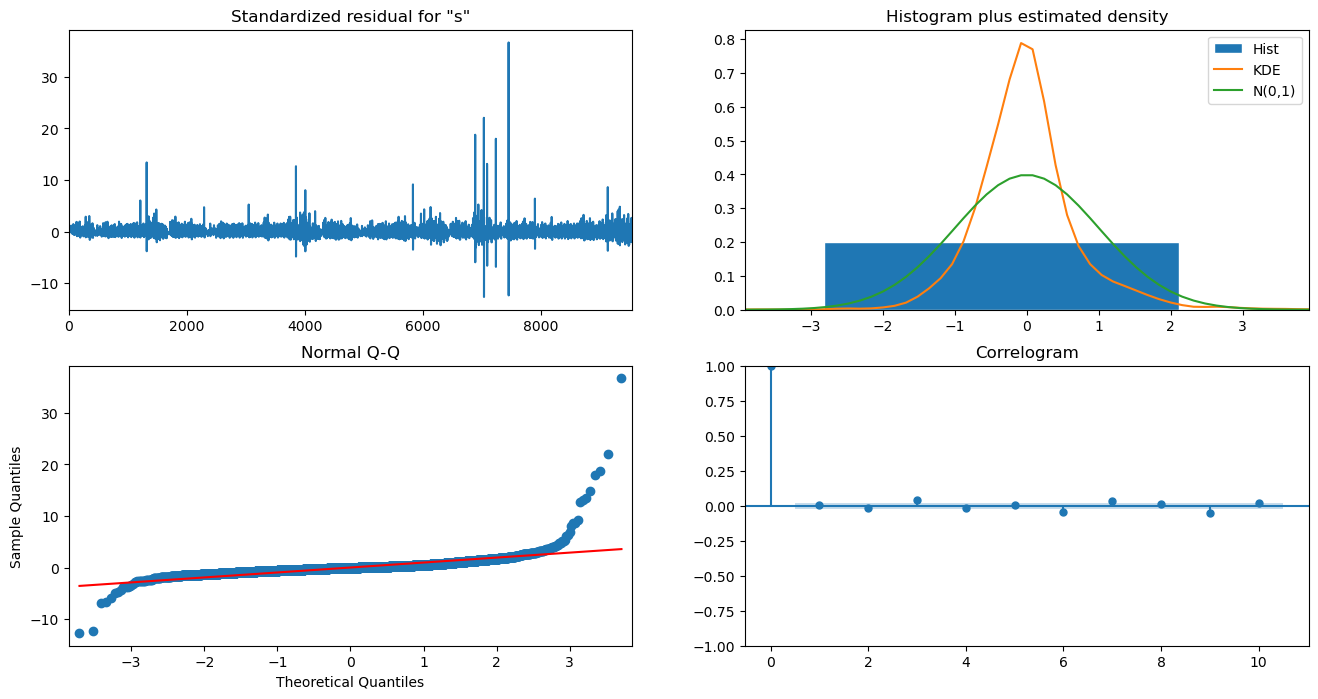

In [150]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [151]:
pred_SARIMA = results.get_forecast(steps=len(f_test_y))
# pred_SARIMA.predicted_mean

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [152]:
from math import sqrt
rmse_s = sqrt(mean_squared_error(f_test_y, pred_SARIMA.predicted_mean, squared=False))
print(rmse_s)

60.0986646859422


In [153]:
r2_score_s = r2_score(f_test_y, pred_SARIMA.predicted_mean)

In [154]:
mean_absolute_percentage_error_s = mean_absolute_percentage_error(f_test_y, pred_SARIMA.predicted_mean)

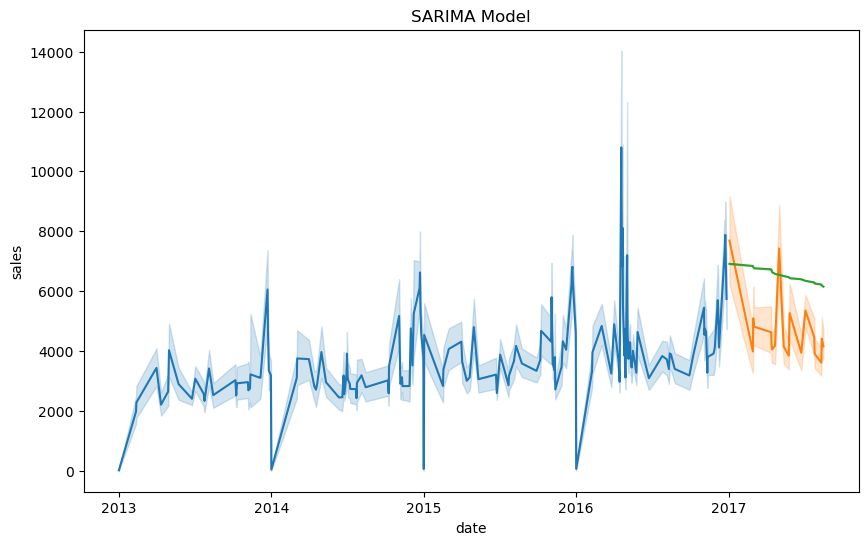

In [155]:
plt.figure(figsize=[10,6])
sns.lineplot(f_train_y,x=f_train_y.index,y=f_train_y.sales)
sns.lineplot(f_test_y,x=f_test_y.index,y=f_test_y.sales)
sns.lineplot(f_test_x,x=f_test_x.index,y=pred_SARIMA.predicted_mean)
plt.title('SARIMA Model')
plt.show()

In [156]:
model = ['Random forest Regressor','XGBoost Regressor','SARIMA']
columns = ['rmse','r2_score','mean_absolute_percentage_error']

In [157]:
out_put = pd.DataFrame(index=model,columns=columns)

In [158]:
out_put['rmse'] = np.array([rmse_rf,rmse_xgb,rmse_s])
out_put['r2_score'] = np.array([r2_score_rf,r2_score_xgb,r2_score_s])
out_put['mean_absolute_percentage_error'] = np.array([mean_absolute_percentage_error_rf,mean_absolute_percentage_error_xgb,mean_absolute_percentage_error_s])

In [159]:
out_put

rmse  r2_score  mean_absolute_percentage_error
Random forest Regressor  3477.481319 -0.233879                    2.107731e+16
XGBoost Regressor        3477.481319 -0.233879                    2.107731e+16
SARIMA                     60.098665 -0.331074                    2.137723e+17

In [160]:
val_SARIMA = results.get_forecast(steps=len(f_test_val))
val_fore_cast = val_SARIMA.predicted_mean

C:\Users\chann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [161]:
val_fore_cast = val_fore_cast.reset_index()

In [162]:
val_fore_cast = val_fore_cast['predicted_mean']

In [163]:
id_v = f_test_val[['id']]

In [164]:
sales = pd.DataFrame({'sales':val_fore_cast})

In [165]:
id_v.insert(1,column='sales',value=sales.values)

In [166]:
# Validation for test values for only family = 'Grocery I' 
id_v.head()

id        sales
12   3000900  7531.469114
45   3000933  7190.107617
78   3000966  7168.356664
111  3000999  7134.789254
144  3001032  6994.467748

In [167]:
id_v.to_csv('final_output_grocery_1.csv',index=False)

# Final Conclusions
* Here out of three model SARIMA model do better so i used this model then predict forecast using this model.
* In SARIMA is doing better compare other model.
* Here i am taking only family ='GROCERY I' for my analysis purpose.
* There are deep learing models are there like LSTM,DAT model and Facebook Phrophet Model due to time constrains i have not done if i used these models i can get better forecasting.